In [27]:
import pandas as pd
import matplotlib.pyplot as plt  # plot
import os
from os.path import join

path = ('archive/')
file = (path + 'labels.csv')
df = pd.read_csv(file)
df.head()

,Unnamed: 0,pth,label,relFCs
0,0,anger/image0000006.jpg,surprise,0.873142
1,1,anger/image0000060.jpg,anger,0.852311
2,2,anger/image0000061.jpg,anger,0.800957
3,3,anger/image0000066.jpg,disgust,0.843079
4,4,anger/image0000106.jpg,anger,0.849108


In [28]:
df.describe()

,Unnamed: 0,relFCs
count,28175.000000,28175.000000
mean,14087.000000,0.799247
std,8133.566253,0.058755
min,0.000000,0.516357
25%,7043.500000,0.766363
50%,14087.000000,0.809000
75%,21130.500000,0.842068
max,28174.000000,0.899951


In [29]:
df.hist

<bound method hist_frame of        Unnamed: 0                        pth     label    relFCs
0               0     anger/image0000006.jpg  surprise  0.873142
1               1     anger/image0000060.jpg     anger  0.852311
2               2     anger/image0000061.jpg     anger  0.800957
3               3     anger/image0000066.jpg   disgust  0.843079
4               4     anger/image0000106.jpg     anger  0.849108
...           ...                        ...       ...       ...
28170       28170  surprise/image0034960.jpg  surprise  0.825263
28171       28171  surprise/image0034961.jpg  surprise  0.738646
28172       28172  surprise/image0034966.jpg  surprise  0.774524
28173       28173  surprise/image0034973.jpg   neutral  0.766952
28174       28174  surprise/image0042075.jpg   disgust  0.832160

[28175 rows x 4 columns]>

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28175 entries, 0 to 28174
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  28175 non-null  int64  
 1   pth         28175 non-null  object 
 2   label       28175 non-null  object 
 3   relFCs      28175 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 880.6+ KB


In [31]:
import os
# Define an empty list
file_counts = []
def countFile(link):
    path = link
    num_files = len([f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))])
    file_counts.append(num_files)
    print(f"Number of files in directory {link} is ", num_files)

In [32]:
countFile("archive/happy")
countFile("archive/sad")
countFile("archive/surprise")
countFile("archive/anger")
countFile("archive/disgust")
countFile("archive/contempt")
countFile("archive/fear")
countFile("archive/neutral")

Number of files in directory archive/happy is  5044
Number of files in directory archive/sad is  3091
Number of files in directory archive/surprise is  4039
Number of files in directory archive/anger is  3218
Number of files in directory archive/disgust is  2477
Number of files in directory archive/contempt is  2871
Number of files in directory archive/fear is  3176
Number of files in directory archive/neutral is  5126


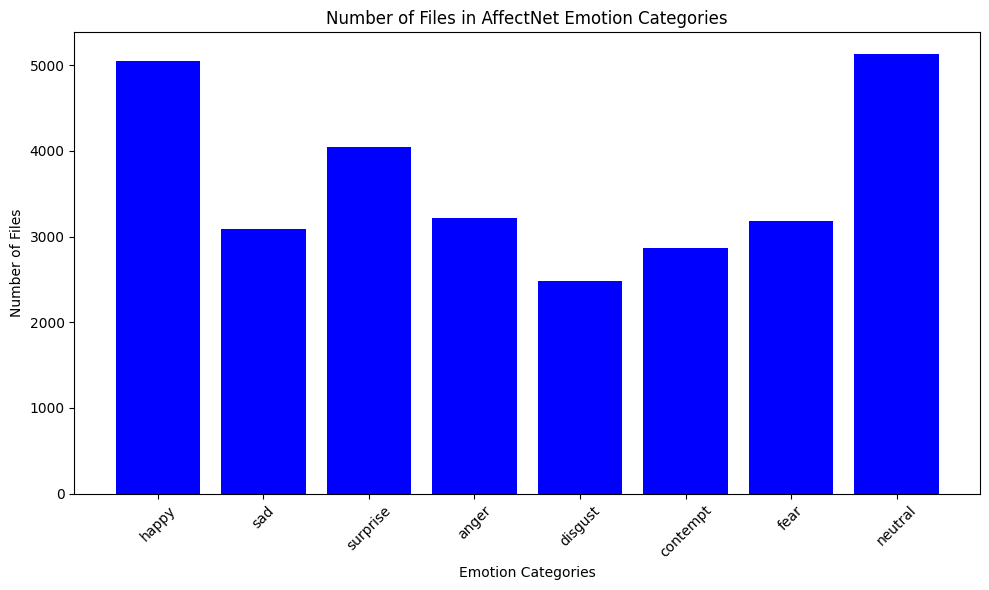

In [33]:
import matplotlib.pyplot as plt

# Data
categories = ['happy', 'sad', 'surprise', 'anger', 'disgust', 'contempt', 'fear', 'neutral']

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(categories, file_counts, color='blue')
plt.xlabel('Emotion Categories')
plt.ylabel('Number of Files')
plt.title('Number of Files in AffectNet Emotion Categories')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

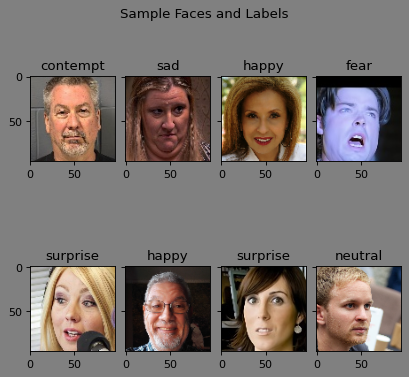

In [34]:
# display random images
import random
import cv2

fig, axs = plt.subplots(2, 4, sharey=True, constrained_layout=True, num=None, 
                        figsize=(5, 5), dpi=80, facecolor='gray', edgecolor='k')
fig.suptitle("Sample Faces and Labels")
axs = axs.flatten()

for i in range(8):
    idx = random.randint(0, len(df)-1)  # randomly select an index
    img_path = path + df['pth'][idx]
    img = cv2.imread(img_path)  # read image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert to BGR to RGB
    axs[i].imshow(img)
    axs[i].set_title(df['label'][idx])

In [35]:

import os

INPUT_PATH = "archive/"
EMOTIONS = [f.name for f in os.scandir(INPUT_PATH) if f.is_dir()]
IMAGE_SIZE = (96, 96)

print(EMOTIONS)

['anger', 'contempt', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [36]:

import cv2
import numpy as np
from keras.utils import to_categorical
import os

def image_generator(input_path, emotions, image_size):
    for index, emotion in enumerate(emotions):
        for filename in os.listdir(os.path.join(input_path, emotion)):
            img = cv2.imread(os.path.join(input_path, emotion, filename))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
            yield img, index

def load_images(input_path, emotions, image_size):
    X, y = [], []
    for img, label in image_generator(input_path, emotions, image_size):
        X.append(img)
        y.append(label)
    X = np.array(X)
    y = to_categorical(np.array(y))
    return X, y

In [37]:
# Load the images
X, y = load_images(INPUT_PATH, EMOTIONS, IMAGE_SIZE)
input_shape = X[0].shape
#input_shape = (96,96,1) 

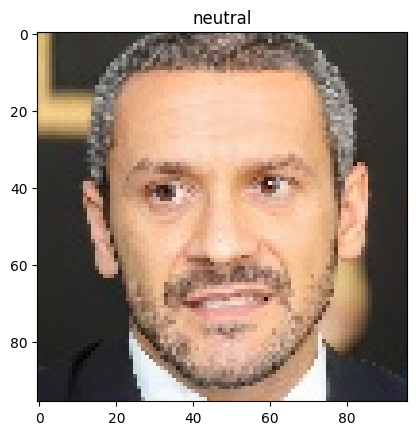

In [38]:
import matplotlib.pyplot as plt

# choose a random image index
idx = np.random.randint(len(X))

# display the image and its corresponding label from arrays
plt.imshow(X[idx])
plt.title(EMOTIONS[np.argmax(y[idx])])
plt.show()